In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import tensorflow as tf # This code has been tested with TensorFlow 1.6


In [3]:
SBI=pd.read_csv('data/daily_NSE_SBIN.csv')
SBI.set_index('timestamp',inplace=True)
AXISBANK=pd.read_csv('data/daily_NSE_AXISBANK.csv')
AXISBANK.set_index('timestamp',inplace=True)
BANKBARODA=pd.read_csv('data/daily_NSE_BANKBARODA.csv')
BANKBARODA.set_index('timestamp',inplace=True)
HDFCBANK=pd.read_csv('data/daily_NSE_HDFCBANK.csv')
HDFCBANK.set_index('timestamp',inplace=True)
ICICIBANK=pd.read_csv('data/daily_NSE_ICICIBANK.csv')
ICICIBANK.set_index('timestamp',inplace=True)
PNB=pd.read_csv('data/daily_NSE_PNB.csv')
PNB.set_index('timestamp',inplace=True)



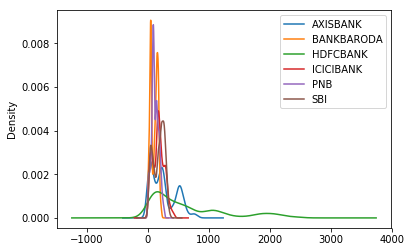

In [59]:
SBI['SBI']=SBI['close']
AXISBANK['AXISBANK']=AXISBANK['close']
BANKBARODA['BANKBARODA']=BANKBARODA['close']
HDFCBANK['HDFCBANK']=HDFCBANK['close']
ICICIBANK['ICICIBANK']=ICICIBANK['close']
PNB['PNB']=PNB['close']
dataSet=pd.concat([SBI, AXISBANK, BANKBARODA,HDFCBANK,ICICIBANK,PNB], axis=1,sort=True)
dataSet=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB','SBI']]
dataSet=dataSet.dropna()
dataSet.plot(kind='kde')


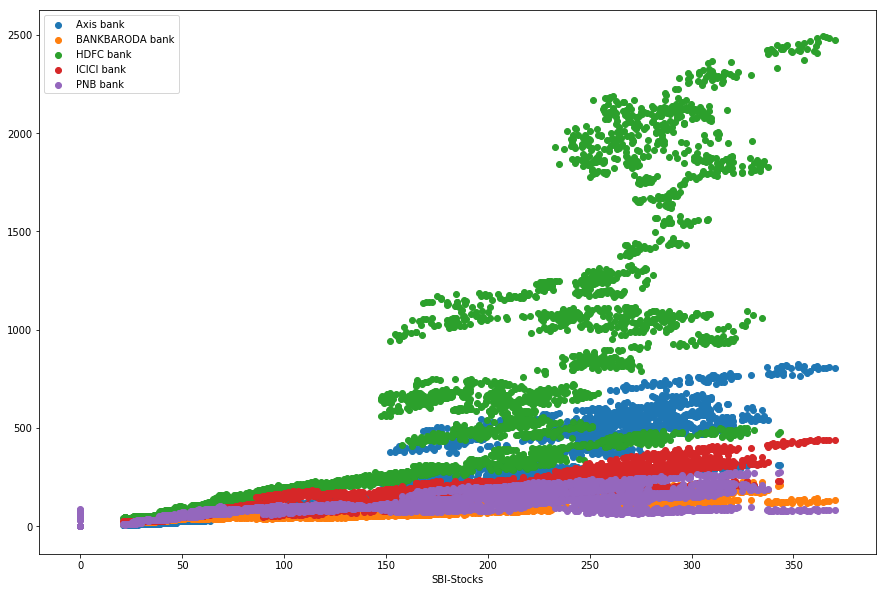

In [60]:
plt.figure(figsize=(15,10))
plt.scatter(dataSet['SBI'],dataSet['AXISBANK'],label='Axis bank')
plt.scatter(dataSet['SBI'],dataSet['BANKBARODA'],label='BANKBARODA bank')
plt.scatter(dataSet['SBI'],dataSet['HDFCBANK'],label='HDFC bank')
plt.scatter(dataSet['SBI'],dataSet['ICICIBANK'],label='ICICI bank')
plt.scatter(dataSet['SBI'],dataSet['PNB'],label='PNB bank')
plt.xlabel('SBI-Stocks')
plt.legend()
plt.show()

In [61]:
results = sm.ols(formula='SBI ~ AXISBANK', data=dataSet).fit()

In [62]:
Y_pred = results.predict(dataSet[["AXISBANK"]])

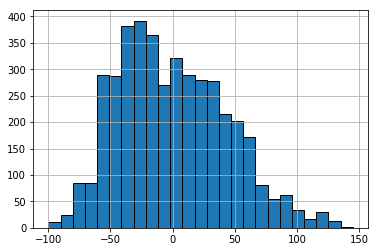

In [63]:

residual = dataSet["SBI"].values-Y_pred
residual.hist(bins=25, ec='k')

In [9]:
x_data=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB']]
y_data=dataSet[['SBI']]


# Summary- Mean,STD

In [10]:
dataSet.describe()

,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,255.193453,104.534215,644.223026,173.664114,119.139035,177.524005
std,204.210155,57.631714,622.237365,94.298316,57.878633,91.221197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.602500,47.737500,167.032500,98.625025,80.625000,89.155675
50%,217.210000,113.740000,437.870000,171.022500,107.505000,193.497500
75%,449.475000,155.925000,1005.125000,237.920500,161.015000,253.962500
max,822.800000,225.580000,2495.000000,440.950000,277.080000,370.650000


### Plot without Standardizer

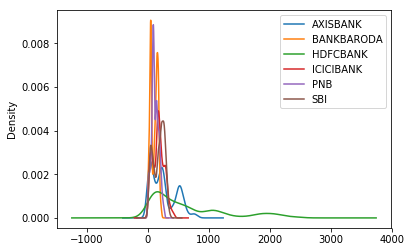

In [11]:
dataSet.plot(kind='kde')

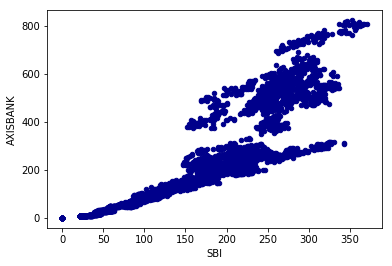

In [12]:
dataSet.plot.scatter(x='SBI',y='AXISBANK',c='DarkBlue')

### Hist without Standardizer

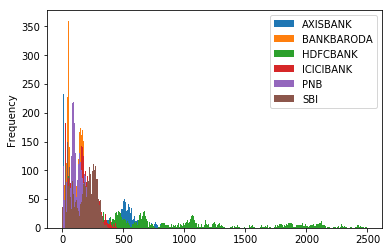

In [13]:
dataSet.plot(kind='hist',bins=500)

## StandardScaler


In [15]:
from sklearn import preprocessing

standardScaler = preprocessing.StandardScaler()
standardScaler_df = pd.DataFrame(standardScaler.fit_transform(dataSet),columns=['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB','SBI'])


In [16]:
standardScaler_df.describe()

,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
count,4240.000000,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4240.000000
mean,0.000000,-3.217552e-16,1.072517e-16,-5.362587e-17,1.340647e-16,0.000000
std,1.000118,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118
min,-1.249808,-1.814045e+00,-1.035455e+00,-1.841863e+00,-2.058671e+00,-1.946312
25%,-0.908931,-9.856277e-01,-7.669851e-01,-7.958566e-01,-6.655060e-01,-0.968840
50%,-0.186024,1.597536e-01,-3.316698e-01,-2.801668e-02,-2.010311e-01,0.175128
75%,0.951493,8.918153e-01,5.800753e-01,6.814964e-01,7.235987e-01,0.838045
max,2.779849,2.100581e+00,2.974741e+00,2.834806e+00,2.729152e+00,2.117367


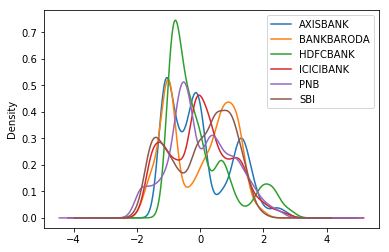

In [17]:
standardScaler_df.plot(kind='kde')

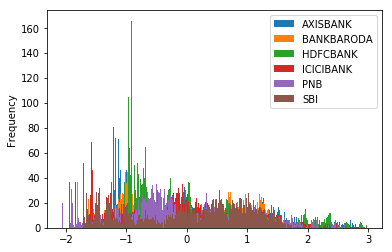

In [18]:
standardScaler_df.plot(kind='hist',bins=500)

# Robust Scaler

In [19]:
robustScaler = preprocessing.RobustScaler()
robustScaler_df = pd.DataFrame(robustScaler.fit_transform(dataSet))


### RobustScaler-Summary

In [20]:
robustScaler_df.describe()

,0,1,2,3,4,5
count,4.240000e+03,4.240000e+03,4240.000000,4240.000000,4240.000000,4240.000000
mean,9.999000e-02,-8.509103e-02,0.246217,0.018964,0.144720,-0.096923
std,5.375755e-01,5.327022e-01,0.742445,0.676966,0.719973,0.553504
min,-5.717971e-01,-1.051323e+00,-0.522460,-1.227768,-1.337293,-1.174087
25%,-3.885712e-01,-6.100751e-01,-0.323159,-0.519740,-0.334370,-0.633116
50%,3.741853e-17,-6.567555e-17,0.000000,0.000000,0.000000,0.000000
75%,6.114288e-01,3.899249e-01,0.676841,0.480260,0.665630,0.366884
max,1.594193e+00,1.033761e+00,2.454538,1.937805,2.109404,1.074910


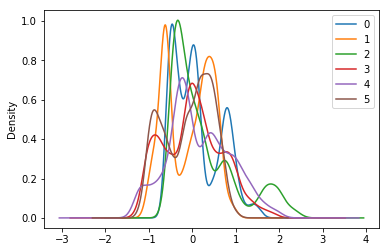

In [21]:
robustScaler_df.plot(kind='kde')

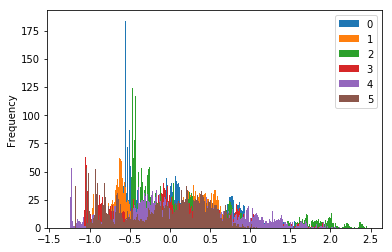

In [22]:
robustScaler_df.plot(kind='hist',bins=500)

# MinMaxScaller

In [23]:
minMaxScaler = preprocessing.MinMaxScaler()
minMaxScaler_df = pd.DataFrame(minMaxScaler.fit_transform(dataSet))

In [24]:
minMaxScaler_df.describe()

,0,1,2,3,4,5
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.310152,0.463402,0.258206,0.393841,0.429981,0.478953
std,0.248189,0.255482,0.249394,0.213853,0.208888,0.246111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.084592,0.211621,0.066947,0.223665,0.290981,0.240539
50%,0.263989,0.504211,0.175499,0.387850,0.387993,0.522049
75%,0.546275,0.691218,0.402856,0.539563,0.581114,0.685181
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


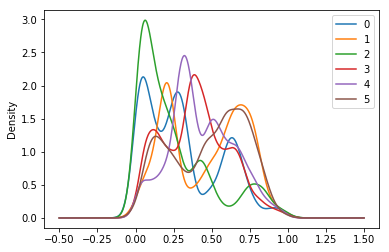

In [25]:
minMaxScaler_df.plot(kind='kde')

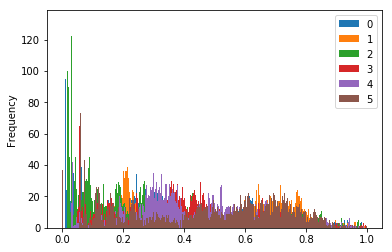

In [26]:
minMaxScaler_df.plot(kind='hist',bins=500)

#  Normalizer

In [27]:
normalizer = preprocessing.Normalizer()
normalizer_df = pd.DataFrame(normalizer.fit_transform(dataSet))

In [28]:
normalizer_df.describe()

,0,1,2,3,4,5
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.310352,0.179640,0.745015,0.295724,0.244074,0.303697
std,0.084953,0.071740,0.134382,0.110060,0.135341,0.107495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.263922,0.136340,0.648042,0.224109,0.125237,0.208827
50%,0.319472,0.180505,0.723572,0.268854,0.257072,0.336669
75%,0.376927,0.231321,0.857469,0.401987,0.342962,0.396116
max,0.476879,0.373199,0.958015,0.545135,1.000000,0.478312


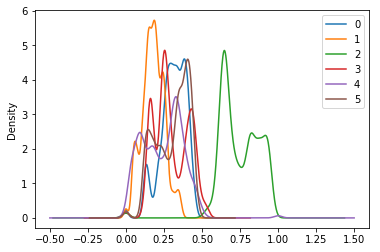

In [29]:
normalizer_df.plot(kind='kde')

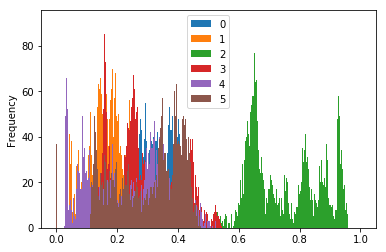

In [30]:
normalizer_df.plot(kind='hist',bins=500)

## MaxAbsScaler

In [31]:
maxAbsScaler = preprocessing.MaxAbsScaler()
maxAbsScaler_df = pd.DataFrame(maxAbsScaler.fit_transform(dataSet))

In [32]:
print(x_data.shape)
print(y_data.shape)

(4240, 5)
(4240, 1)


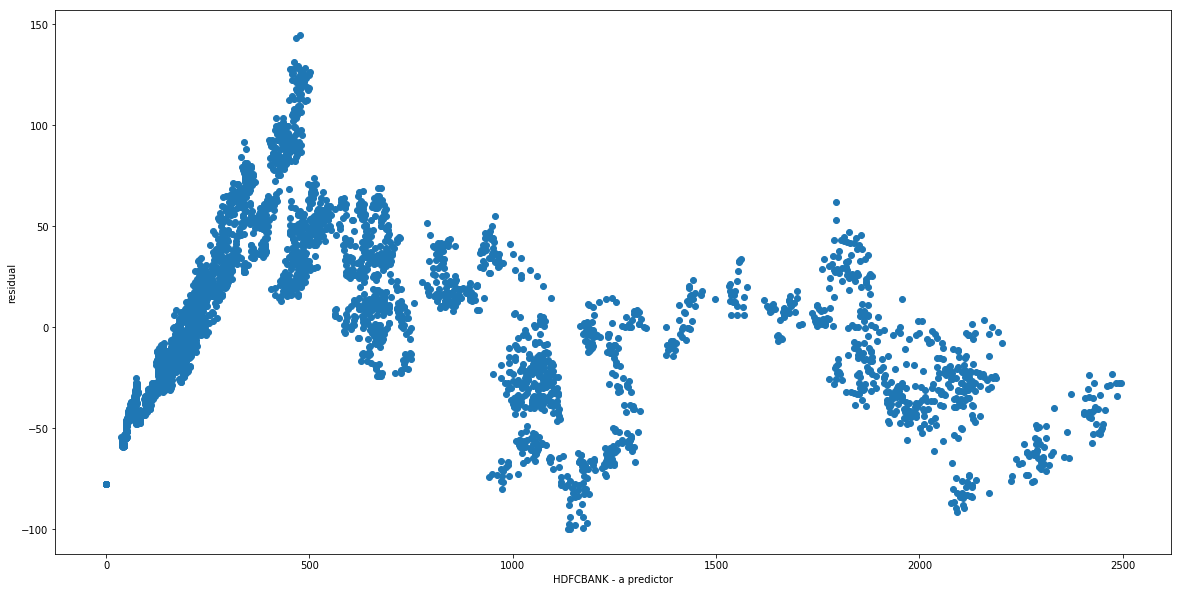

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(dataSet[["HDFCBANK"]],residual)
plt.xlabel("HDFCBANK - a predictor")
plt.ylabel("residual")
plt.show()

In [41]:
results = sm.ols(formula='SBI~AXISBANK+BANKBARODA+HDFCBANK+ICICIBANK+PNB',data =dataSet).fit()
Y_ols_pred=results.predict(x_data)
x_data.columns.values
dataSet.reset_index(inplace=True)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBI   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.333e+04
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:00:24   Log-Likelihood:                -18046.
No. Observations:                4240   AIC:                         3.610e+04
Df Residuals:                    4234   BIC:                         3.614e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6235      0.719     -3.649      0.000      -4.033      -1.214
AXISBANK       0.1388      0.006     21.701      0.000       0.126       0.151
BANKBARODA    -0.0824      0.016     -5.146      0.000      -0.114      -0.051
HDFCBANK       0.0239      0.002     15.553      0.000       0.021       0.027
ICICIBANK      0.2712      0.010     26.598      0.000       0.251       0.291
PNB            0.7627      0.013     60.020      0.000       0.738       0.788
==============================================================================
Omnibus:                      110.581   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.765
Skew:                           0.144   Prob(JB):                     8.64e-15
Kurtosis:                       2.467   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Training and test data
# Dimensions of dataset
dataSet=dataSet.drop(['index'],axis=1)
data=dataSet.values
n = data.shape[0]
p = data.shape[1]

train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


In [43]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]


            AXISBANK  BANKBARODA  HDFCBANK  ICICIBANK       PNB       SBI
AXISBANK    1.000000    0.766593  0.941075   0.943906  0.391619  0.878153
BANKBARODA  0.766593    1.000000  0.617006   0.775626  0.823044  0.902321
HDFCBANK    0.941075    0.617006  1.000000   0.887720  0.204168  0.770753
ICICIBANK   0.943906    0.775626  0.887720   1.000000  0.498216  0.918877
PNB         0.391619    0.823044  0.204168   0.498216  1.000000  0.735676
SBI         0.878153    0.902321  0.770753   0.918877  0.735676  1.000000


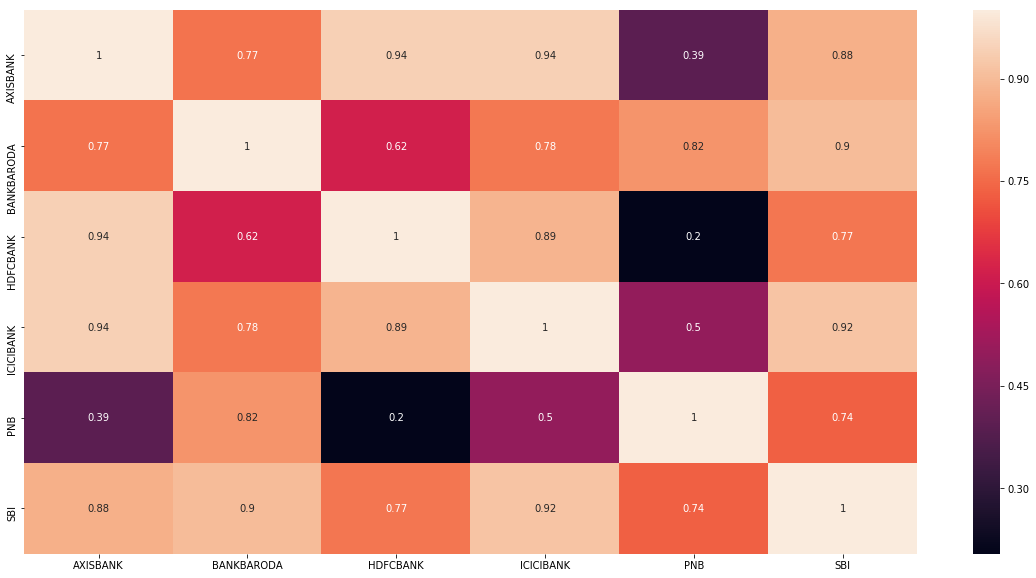

In [45]:
co_relations=dataSet.corr()
plt.figure(figsize=(20,10))
sns.heatmap(co_relations, annot=True)
plt.show()

In [46]:
co_relations

,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
AXISBANK,1.000000,0.766593,0.941075,0.943906,0.391619,0.878153
BANKBARODA,0.766593,1.000000,0.617006,0.775626,0.823044,0.902321
HDFCBANK,0.941075,0.617006,1.000000,0.887720,0.204168,0.770753
ICICIBANK,0.943906,0.775626,0.887720,1.000000,0.498216,0.918877
PNB,0.391619,0.823044,0.204168,0.498216,1.000000,0.735676
SBI,0.878153,0.902321,0.770753,0.918877,0.735676,1.000000


## Tensorflow Starts 

In [47]:
import tensorflow as tf
import numpy as np
n=5
y_data=np.reshape(y_data, -1)


In [48]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [49]:
# Model architecture parameters
n_stocks = 5
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [50]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [51]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [83]:
# Optimizer
opt = tf.train.AdamOptimizer(0.01).minimize(mse)

In [84]:

X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]



In [85]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())


# Number of epochs and batch size
epochs = 100
batch_size = 512

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})       

mse_train = net.run(mse, feed_dict={X: X_train, Y: y_train})
mse_test = net.run(mse, feed_dict={X: X_test, Y: y_test})

print('Training dataset Error', mse_train)
print( 'Test dataset Error',mse_test)



Training dataset Error 0.00034880906
Test dataset Error 0.06776283
